# Usando dados do SINAN via PySUS
Este exercício deve ser executado no ambiente do Google Colab.

In [ ]:
!pip install pysus

In [2]:
from pysus.online_data import SINAN
import pandas as pd

In [3]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Cancer',
 'Chagas',
 'Chikungunya',
 'Colera',
 'Coqueluche',
 'Contact Communicable Disease',
 'Acidentes de Trabalho',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Sífilis Adquirida',
 'Sífilis Congênita',
 'Sífilis em Gestante',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica',
 'Zika']

In [4]:
SINAN.get_available_years('Sífilis Adquirida')

['2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [5]:
df = SINAN.download('Sífilis Adquirida', [2017,2018])
df

('/root/pysus/SIFABR17.parquet', '/root/pysus/SIFABR18.parquet')

In [6]:
df17 = pd.read_parquet(df[0])
df17

,TP_NOT,ID_AGRAVO,CS_SUSPEIT,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,DT_SIN_PRI,SEM_PRI,...,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,TP_SISTEMA,TPUNINOT
0,2,A539,,20170609,201723,2017,35,355030,20170316,201711,...,3,,0,,9,9,********,20170830,,
1,2,A539,,20170612,201724,2017,35,350950,20170316,201711,...,1,35,1,350950,2,9,********,20170613,,
2,2,A539,,20170612,201724,2017,35,354980,20170316,201711,...,1,35,1,354980,,1,********,20170612,,
3,2,A539,,20170613,201724,2017,35,354340,20170316,201711,...,1,35,1,354340,2,1,********,20170705,,
4,2,A539,,20170613,201724,2017,35,354340,20170316,201711,...,1,35,1,354340,2,1,********,20170713,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120742,2,A539,,20171024,201743,2017,35,350070,20170920,201738,...,1,35,1,350070,2,1,********,20171108,,
120743,2,A539,,20171024,201743,2017,43,431020,20170920,201738,...,,,0,,,,********,20180105,,
120744,2,A539,,20171024,201743,2017,31,316255,20170920,201738,...,,,0,,,,********,20180111,,
120745,2,A539,,20171024,201743,2017,31,313130,20170920,201738,...,1,31,1,313130,2,1,********,20171024,,


In [7]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120747 entries, 0 to 120746
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   TP_NOT      120747 non-null  object
 1   ID_AGRAVO   120747 non-null  object
 2   CS_SUSPEIT  120747 non-null  object
 3   DT_NOTIFIC  120747 non-null  object
 4   SEM_NOT     120747 non-null  object
 5   NU_ANO      120747 non-null  object
 6   SG_UF_NOT   120747 non-null  object
 7   ID_MUNICIP  120747 non-null  object
 8   DT_SIN_PRI  120747 non-null  object
 9   SEM_PRI     120747 non-null  object
 10  NU_IDADE_N  120747 non-null  object
 11  CS_SEXO     120747 non-null  object
 12  CS_GESTANT  120747 non-null  object
 13  CS_RACA     120747 non-null  object
 14  CS_ESCOL_N  120747 non-null  object
 15  SG_UF       120747 non-null  object
 16  ID_MN_RESI  120747 non-null  object
 17  ID_RG_RESI  120747 non-null  object
 18  ID_PAIS     120747 non-null  object
 19  NDUPLIC_N   120747 non-

## Convertendo datas

In [8]:
df17['DT_NOTIFIC'] = pd.to_datetime(df17['DT_NOTIFIC'])

In [11]:
df17.set_index('DT_NOTIFIC', inplace=True)
df17

,TP_NOT,ID_AGRAVO,CS_SUSPEIT,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,DT_SIN_PRI,SEM_PRI,NU_IDADE_N,...,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,TP_SISTEMA,TPUNINOT
DT_NOTIFIC,,,,,,,,,,,,,,,,,,,,,
2017-06-09,2,A539,,201723,2017,35,355030,20170316,201711,4074,...,3,,0,,9,9,********,20170830,,
2017-06-12,2,A539,,201724,2017,35,350950,20170316,201711,4022,...,1,35,1,350950,2,9,********,20170613,,
2017-06-12,2,A539,,201724,2017,35,354980,20170316,201711,4037,...,1,35,1,354980,,1,********,20170612,,
2017-06-13,2,A539,,201724,2017,35,354340,20170316,201711,4074,...,1,35,1,354340,2,1,********,20170705,,
2017-06-13,2,A539,,201724,2017,35,354340,20170316,201711,4072,...,1,35,1,354340,2,1,********,20170713,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-24,2,A539,,201743,2017,35,350070,20170920,201738,4050,...,1,35,1,350070,2,1,********,20171108,,
2017-10-24,2,A539,,201743,2017,43,431020,20170920,201738,4050,...,,,0,,,,********,20180105,,
2017-10-24,2,A539,,201743,2017,31,316255,20170920,201738,4028,...,,,0,,,,********,20180111,,


In [15]:
df17w = df17.resample('D').count()

In [ ]:
df17w

<Axes: xlabel='DT_NOTIFIC'>

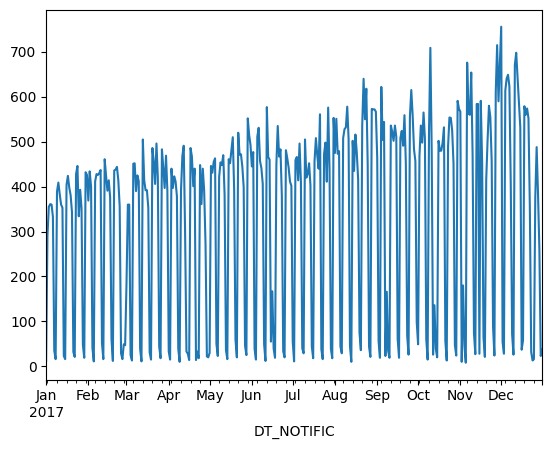

In [16]:
df17w.CLASSI_FIN.plot()

In [18]:
df17.groupby('ID_MUNICIP').count().sort_values('TP_NOT')

,TP_NOT,ID_AGRAVO,CS_SUSPEIT,SEM_NOT,NU_ANO,SG_UF_NOT,DT_SIN_PRI,SEM_PRI,NU_IDADE_N,CS_SEXO,...,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,TP_SISTEMA,TPUNINOT
ID_MUNICIP,,,,,,,,,,,,,,,,,,,,,
421440,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
270090,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
270130,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
270170,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
430063,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420910,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056,...,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
410690,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181,...,2181,2181,2181,2181,2181,2181,2181,2181,2181,2181
310620,3447,3447,3447,3447,3447,3447,3447,3447,3447,3447,...,3447,3447,3447,3447,3447,3447,3447,3447,3447,3447


In [20]:
gb = df17.groupby('ID_MUNICIP')

In [21]:
gb.groups

{'110001': [2017-03-28 00:00:00, 2017-06-26 00:00:00, 2017-01-09 00:00:00, 2017-02-23 00:00:00], '110002': [2017-04-11 00:00:00, 2017-06-30 00:00:00, 2017-07-25 00:00:00, 2017-05-04 00:00:00, 2017-09-04 00:00:00, 2017-05-09 00:00:00, 2017-06-19 00:00:00, 2017-05-23 00:00:00, 2017-06-05 00:00:00, 2017-06-05 00:00:00, 2017-06-13 00:00:00, 2017-06-20 00:00:00, 2017-09-25 00:00:00, 2017-09-28 00:00:00, 2017-11-01 00:00:00, 2017-11-16 00:00:00, 2017-11-16 00:00:00, 2017-11-17 00:00:00, 2017-11-20 00:00:00, 2017-11-21 00:00:00, 2017-11-24 00:00:00, 2017-11-28 00:00:00, 2017-11-30 00:00:00, 2017-12-01 00:00:00, 2017-12-01 00:00:00, 2017-12-05 00:00:00, 2017-12-04 00:00:00, 2017-12-07 00:00:00, 2017-12-08 00:00:00, 2017-12-27 00:00:00, 2017-12-13 00:00:00, 2017-12-20 00:00:00, 2017-12-20 00:00:00, 2017-12-20 00:00:00, 2017-12-20 00:00:00, 2017-02-22 00:00:00, 2017-04-03 00:00:00, 2017-01-10 00:00:00, 2017-01-10 00:00:00, 2017-01-17 00:00:00, 2017-01-24 00:00:00, 2017-02-16 00:00:00, 2017-01-30

In [22]:
from pysus.preprocessing.decoders import decodifica_idade_SINAN

In [24]:
df17['idade'] = decodifica_idade_SINAN(df17.NU_IDADE_N)

In [25]:
df17[['NU_IDADE_N', 'idade']]

,NU_IDADE_N,idade
DT_NOTIFIC,,
2017-06-09,4074,74.0
2017-06-12,4022,22.0
2017-06-12,4037,37.0
2017-06-13,4074,74.0
2017-06-13,4072,72.0
...,...,...
2017-10-24,4050,50.0
2017-10-24,4050,50.0
2017-10-24,4028,28.0


In [26]:
df17.CLASSI_FIN.value_counts()

1     91047
8     25145
       2858
2      1697
Name: CLASSI_FIN, dtype: int64

In [28]:
df17.CLASSI_FIN.replace('', pd.NA).dropna()

DT_NOTIFIC
2017-06-09    1 
2017-06-12    1 
2017-06-12    1 
2017-06-13    1 
2017-06-13    1 
              ..
2017-10-24    1 
2017-10-24    8 
2017-10-24    8 
2017-10-24    1 
2017-10-24    1 
Name: CLASSI_FIN, Length: 120747, dtype: object